In [1]:
import pandas as pd
import sklearn as sk
import sklearn.preprocessing as skprep
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
subject=1 #takes 1 or 2
activity=1 #takes values from 1 to 10
repeat=1 #takes values from 1 to 5

file= "./TrainData/subject%d/activity%d/subject_%d_activity_%d_repeat_%d.csv" % (subject,activity,subject,activity,repeat)


In [3]:
for i in range(1,3):
    for j in range(1,11):
        for k in range(1,6):
            if (i==1 and j==6 and k==5): #Cas particulier!
                a=2
                b=6
                c=6
                file= "./TrainData/subject%d/activity%d/subject_%d_activity_%d_repeat_%d.csv" % (a,b,a,b,c)
                locals()["df" + str(a)+ str(b)+ str(c)]=pd.read_csv(file)
            else:
                file= "./TrainData/subject%d/activity%d/subject_%d_activity_%d_repeat_%d.csv" % (i,j,i,j,k)
                locals()["df" + str(i)+ str(j)+ str(k)]=pd.read_csv(file)

FileNotFoundError: [Errno 2] No such file or directory: './TrainData/subject1/activity1/subject_1_activity_1_repeat_1.csv'

In [4]:
df111

NameError: name 'df111' is not defined

## TP MACHINE LEARNING

### Visualisation des données

In [132]:
ListC= ['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4',
       'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6', 'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8',
       'X9', 'Y9', 'Z9', 'X10', 'Y10', 'Z10', 'X11', 'Y11', 'Z11', 'X12',
       'Y12', 'Z12', 'X13', 'Y13', 'Z13', 'subject_id', 'activity'] # Liste des colonnes
df111.describe()


,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,...,Y11,Z11,X12,Y12,Z12,X13,Y13,Z13,subject_id,activity
count,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5290.000000,...,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.0,5360.0
mean,305.105793,107.683430,1698.131210,356.347910,171.686989,1611.875212,248.841027,51.138850,1601.404445,377.362034,...,-30.727256,1034.969375,75.951609,100.732119,1035.861275,112.366595,-99.366568,1108.522543,1.0,1.0
std,223.913229,226.744380,46.921359,239.511944,258.123113,69.954141,175.879524,190.338229,33.691936,109.342899,...,114.991051,10.721651,116.197303,59.112273,17.095073,58.397580,69.442216,18.405911,0.0,0.0
min,-28.880170,-217.910720,1600.783570,3.804760,-243.420990,1476.451900,-81.651590,-200.172000,1493.626590,152.598950,...,-217.995220,1012.648800,-123.737270,-15.683580,996.556520,-43.070270,-205.856800,1073.356930,1.0,1.0
25%,96.036380,-89.203185,1662.014163,128.023220,-51.247610,1560.608677,91.245040,-111.771440,1579.609040,268.950440,...,-142.117928,1026.136015,-20.603758,54.777225,1025.964962,66.091530,-153.018870,1091.049680,1.0,1.0
50%,253.786185,44.056665,1700.772460,292.680480,111.613360,1604.907775,228.815965,-16.859145,1611.477475,396.227785,...,-28.554580,1032.604310,48.742155,85.249900,1037.311770,121.122780,-124.965915,1109.180175,1.0,1.0
75%,534.065690,321.760047,1739.056180,608.970110,416.728043,1658.415775,423.867442,226.772383,1627.428040,481.746312,...,80.357975,1043.723417,191.968060,153.461768,1049.274263,160.051228,-35.784555,1124.603028,1.0,1.0
max,687.389470,522.787840,1776.186400,746.951970,622.928890,1759.465820,551.237730,414.935420,1651.099850,560.825930,...,143.016250,1072.740480,275.501370,221.717350,1071.653560,216.564100,45.285090,1142.027470,1.0,1.0


Text(0.5, 1.0, "Boxplot des valeurs des capteurs pour l'action X")

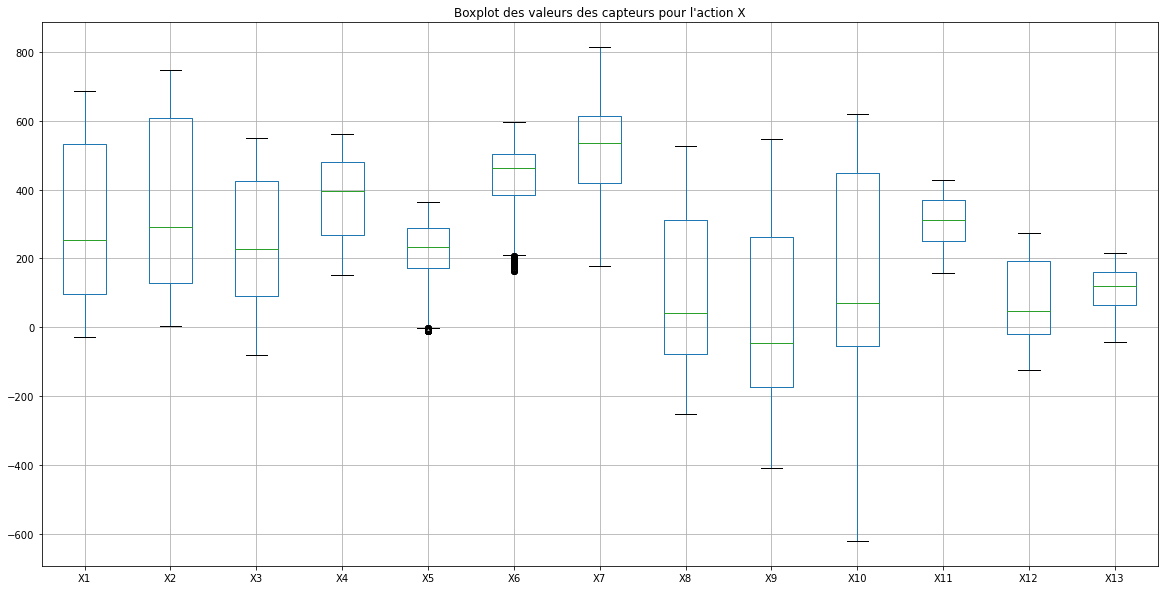

In [133]:
plt.figure(figsize=(20,10))
df111[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13']].boxplot()
plt.title("Boxplot des valeurs des capteurs pour l'action X")

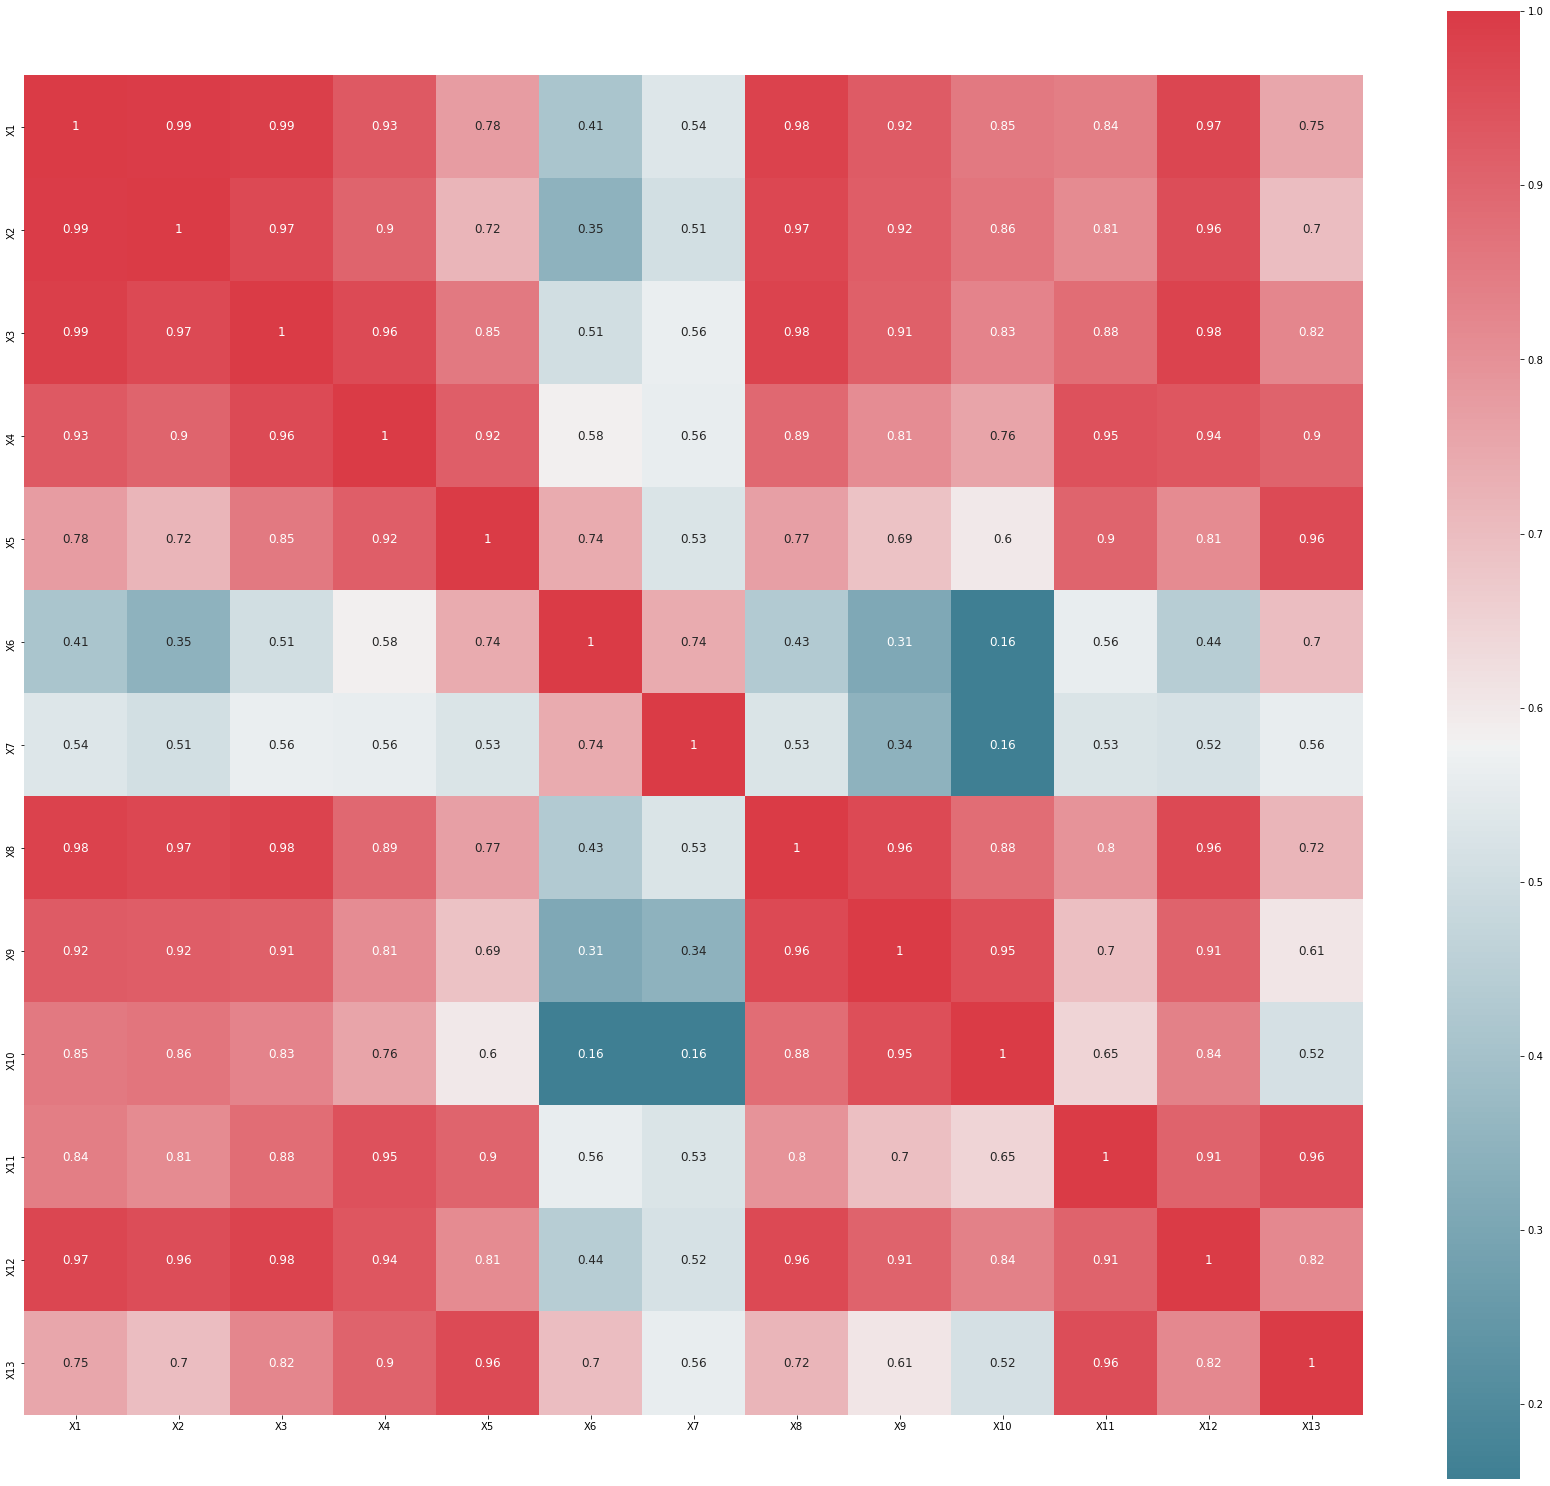

In [134]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 30 , 30 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

plot_correlation_map(df111[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13']])


In [135]:
#df114.count()-len(df114)

# Valeurs manquantes pour certains attributs -> Le vecteur ne vaut pas 0 partout
# On peut aussi remarquer ça avec la fonctionnalité .describe()

## Nous avons importé notre Data : pour le sujet x, l'activité y, et la répétition z, il suffit de prendre la DataFrame dfxyz

Exemple: Sujet 1, Activité 4 , répétition 3 : df143

On remarque par ailleurs deux choses : 

1) Valeurs manquantes
2) pour l'activité 6 : 4 répétitions pour le sujet 1, 

## Preprocessing (imputation valeurs manquantes, hypothèses ...)

In [136]:
from sklearn.impute import SimpleImputer

imputa = SimpleImputer(missing_values = np.nan, strategy = 'mean')

#Code non optimisée du tout, mais fonctionne bien -> La différence de complexité ne change rien pour notre étude actuelle

for i in range(1,3):
    for j in range(1,11):
        for k in range(1,6):
            if (i==1 and j==6 and k==5): #Cas particulier!
                a=2
                b=6
                c=6
                x=np.array(locals()["df" + str(a)+ str(b)+ str(c)])
                imputa.fit(x)
                x=imputa.transform(x)
                x=pd.DataFrame(x)
                locals()["df" + str(a)+ str(b)+ str(c)]=x
                x.columns=ListC
            else:
                x=np.array(locals()["df" + str(i)+ str(j)+ str(k)])
                imputa.fit(x)
                x=imputa.transform(x)
                x=pd.DataFrame(x)
                locals()["df" + str(i)+ str(j)+ str(k)]=x
                x.columns=ListC
                
# ça marche!


In [137]:
df111.describe() # Pour voir que ça marche on peut comparer par exemple l'attribut X4 entre cette dataframe et celle au dessus qui représentent la même chose!

,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,...,Y11,Z11,X12,Y12,Z12,X13,Y13,Z13,subject_id,activity
count,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,...,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5360.0,5360.0
mean,305.105793,107.683430,1698.131210,356.347910,171.686989,1611.875212,248.841027,51.138850,1601.404445,377.362034,...,-30.727256,1034.969375,75.951609,100.732119,1035.861275,112.366595,-99.366568,1108.522543,1.0,1.0
std,223.913229,226.744380,46.921359,239.511944,258.123113,69.954141,175.879524,190.338229,33.691936,108.626426,...,114.991051,10.721651,116.197303,59.112273,17.095073,58.397580,69.442216,18.405911,0.0,0.0
min,-28.880170,-217.910720,1600.783570,3.804760,-243.420990,1476.451900,-81.651590,-200.172000,1493.626590,152.598950,...,-217.995220,1012.648800,-123.737270,-15.683580,996.556520,-43.070270,-205.856800,1073.356930,1.0,1.0
25%,96.036380,-89.203185,1662.014163,128.023220,-51.247610,1560.608677,91.245040,-111.771440,1579.609040,269.988935,...,-142.117928,1026.136015,-20.603758,54.777225,1025.964962,66.091530,-153.018870,1091.049680,1.0,1.0
50%,253.786185,44.056665,1700.772460,292.680480,111.613360,1604.907775,228.815965,-16.859145,1611.477475,393.168335,...,-28.554580,1032.604310,48.742155,85.249900,1037.311770,121.122780,-124.965915,1109.180175,1.0,1.0
75%,534.065690,321.760047,1739.056180,608.970110,416.728043,1658.415775,423.867442,226.772383,1627.428040,481.151435,...,80.357975,1043.723417,191.968060,153.461768,1049.274263,160.051228,-35.784555,1124.603028,1.0,1.0
max,687.389470,522.787840,1776.186400,746.951970,622.928890,1759.465820,551.237730,414.935420,1651.099850,560.825930,...,143.016250,1072.740480,275.501370,221.717350,1071.653560,216.564100,45.285090,1142.027470,1.0,1.0


In [138]:

# Vecteurs Xabc et Yabc

ListX=[]
ListY=[]

for i in range(1,3):
    for j in range(1,11):
        for k in range(1,6):
            if (i==1 and j==6 and k==5): #Cas particulier!
                a=2
                b=6
                c=6
                locals()["X" + str(a)+ str(b)+ str(c)]=np.array(locals()["df" + str(a)+ str(b)+ str(c)].drop(columns=["subject_id","activity"]))
                locals()["Y" + str(a)+ str(b)+ str(c)]=np.array(locals()["df" + str(a)+ str(b)+ str(c)]["activity"])
                ListY.append(locals()["Y" + str(a)+ str(b)+ str(c)])             
            else:
                locals()["X" + str(i)+ str(j)+ str(k)]=np.array(locals()["df" + str(i)+ str(j)+ str(k)].drop(columns=["subject_id","activity"]))
                locals()["Y" + str(i)+ str(j)+ str(k)]=np.array(locals()["df" + str(i)+ str(j)+ str(k)]["activity"])
                ListY.append(locals()["Y" + str(i)+ str(j)+ str(k)])


Toutes les données sont numériques -> Nul besoin de les catégoriser 

# Standard Scaling

In [139]:
# Partie scaling (inutile de scaler les Yi)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

for i in range(1,3):
    for j in range(1,11):
        for k in range(1,6):
            if (i==1 and j==6 and k==5): #Cas particulier!
                a=2
                b=6
                c=6
                #locals()["X" + str(a)+ str(b)+ str(c)]=scaler.fit_transform(locals()["X" + str(a)+ str(b)+ str(c)])
                ListX.append(locals()["X" + str(a)+ str(b)+ str(c)])            
            else:
                #locals()["X" + str(i)+ str(j)+ str(k)]=scaler.fit_transform(locals()["X" + str(i)+ str(j)+ str(k)])
                ListX.append(locals()["X" + str(i)+ str(j)+ str(k)])




In [140]:
#Test Data:

for i in range(1,51):
    file= "./TestData/%d.csv" % (i)
    locals()["dfTest" + str(i)]=pd.read_csv(file)
    locals()["dfTest" + str(i)]=locals()["dfTest" + str(i)].drop(columns=['Unnamed: 0'])


In [141]:
ListT=[]
for j in range(1,51):
    locals()["XTest" + str(j)]=np.array(locals()["dfTest" + str(j)].drop(columns=["subject_id"]))
    #locals()["XTest" + str(j)]=scaler.fit_transform(locals()["XTest" + str(j)])
    ListT.append(locals()["XTest" + str(j)])
    
    
    

# Classification & Choix de modèle

In [142]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#classifier=SVC(kernel="linear",random_state=1)
#classifier=GaussianNB()
classifier = LogisticRegression(random_state = 0)

XTrain=np.concatenate(ListX)
YTrain=np.concatenate(ListY)
classifier.fit(XTrain,YTrain)

LogisticRegression(random_state=0)

In [143]:
Data=np.concatenate(ListT)
imputa.fit(Data)
Data=imputa.transform(Data)

ypred=classifier.predict(Data)
ypred

array([8., 8., 8., ..., 2., 2., 2.])

In [144]:
np.unique(ypred)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [145]:
for i in range(1,51):
    imputa.fit(locals()["XTest"+str(i)])
    locals()["XTest"+str(i)]=imputa.transform(locals()["XTest"+str(i)])




from collections import Counter
ListRes=[]
for i in range(1,51):
    ytmp=classifier.predict(locals()["XTest" + str(i)])
    ytmp=Counter(ytmp)
    ListRes.append(ytmp.most_common(1)[0][0])
    

In [146]:
#ListRes

In [147]:
#Autre modele
classifier2=DecisionTreeClassifier()
XTrain=np.concatenate(ListX)
YTrain=np.concatenate(ListY)
classifier2.fit(XTrain,YTrain)

Data=np.concatenate(ListT)
imputa.fit(Data)
Data=imputa.transform(Data)

ypred=classifier2.predict(Data)


for i in range(1,51):
    imputa.fit(locals()["XTest"+str(i)])
    locals()["XTest"+str(i)]=imputa.transform(locals()["XTest"+str(i)])




from collections import Counter
ListRes2=[]
for i in range(1,51):
    ytmp=classifier.predict(locals()["XTest" + str(i)])
    ytmp=Counter(ytmp)
    ListRes2.append(ytmp.most_common(1)[0][0])


In [148]:
np.unique(np.array(ListRes)-np.array(ListRes2)) # La différence entre les listes renvoyées par les deux modèles

array([0.])

In [149]:
df=pd.DataFrame(ListRes)
df.index+=1
df = df.rename({0:'classe'}, axis=1) 
df.index.names=['numFic']
df.to_csv('resClassification.csv')

# Interprétation des résultats

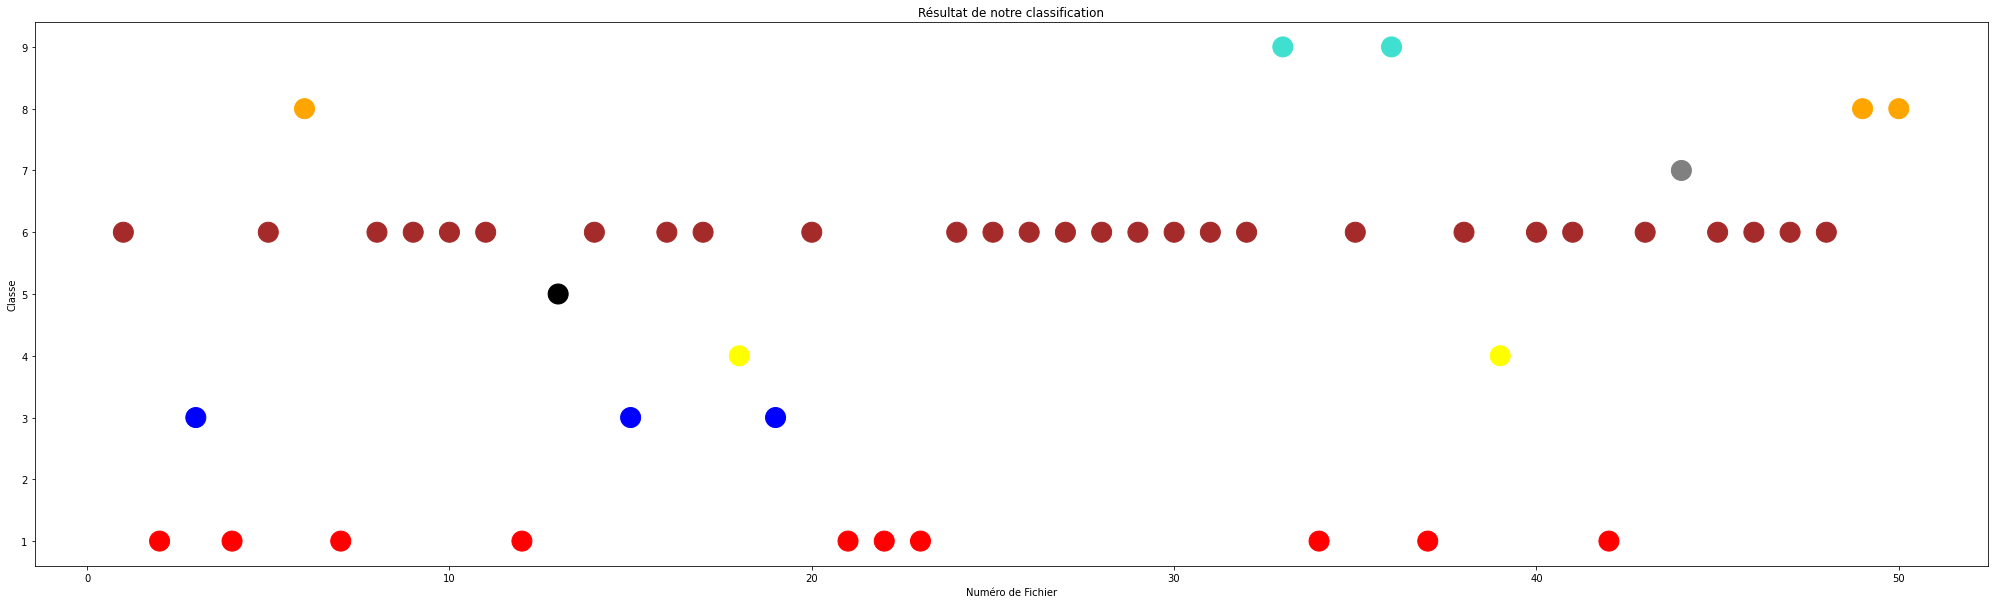

In [150]:
import matplotlib
XXX=[i for i in range(1,51)]
plt.figure(figsize=(35,10))
plt.title("Résultat de notre classification")
plt.xlabel("Numéro de Fichier")
plt.ylabel("Classe")
colors=["red","green","blue","yellow","magenta","black","brown","gray","orange","turquoise"]
label = ListRes
plt.scatter(XXX,ListRes,c=label,cmap=matplotlib.colors.ListedColormap(colors),s=400)

**On peut également s'intéresser à l'importance des attributs:**

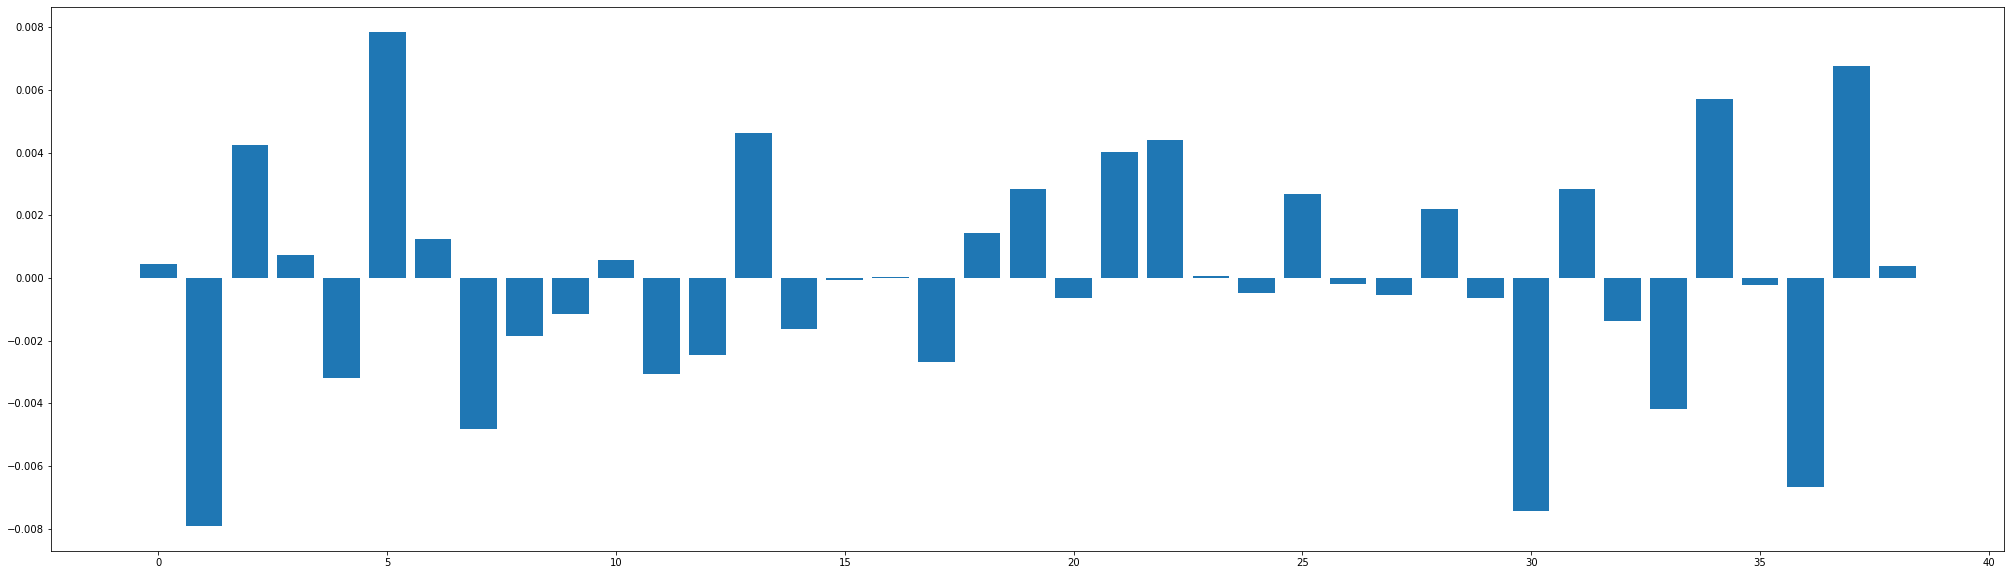

In [151]:
feature_names=['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4',
       'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6', 'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8',
       'X9', 'Y9', 'Z9', 'X10', 'Y10', 'Z10', 'X11', 'Y11', 'Z11', 'X12',
       'Y12', 'Z12', 'X13', 'Y13', 'Z13']

df=pd.DataFrame(XTrain)
df.columns=feature_names

importance = classifier.coef_[0]

plt.figure(figsize=(35,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**Interprétation des intervalles de confiance**

En effet, nous n'avons pas trouvé une seule classe dans chaque fichier, il existe plusieurs classes présentes dans les prédictions de chaque échantillon.

Notre raisonnement a été de sélectionner la plus présente, mais il reste nécessaire de prendre en considération l'intervalle de confiance créé par la présence d'autres attributs.

Pour ce faire, nous allons commencer par calculer le pourcentage que constitue cet attribut dans l'échantillon de classes.